## importing necessary libraries

In [116]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [117]:
### taking data as ndarray

weight = np.array([2,4,5,3,6,5,7]) # this is independent feature x

price = np.array([35,60,20,50,50,55,60]) # this is dependent feature y

## Creating DataFrame using pandas

In [118]:
df = pd.DataFrame({'weight': weight, 'price': price})
df

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [119]:
df.describe()

,weight,price
count,7.000000,7.000000
mean,4.571429,47.142857
std,1.718249,14.679107
min,2.000000,20.000000
25%,3.500000,42.500000
50%,5.000000,50.000000
75%,5.500000,57.500000
max,7.000000,60.000000


In [120]:
### checking correlation
df.corr()

,weight,price
weight,1.000000,0.306795
price,0.306795,1.000000


## Task 01:
### Your objective is to manually compute the slope (M) and y-intercept (C) using
### Ordinary Least Squares Linear Regression. Once determined, apply these values to
### predict the price when the vegetable weight is 6.

In [121]:
### calculating mean of x

mean_x = np.mean(df['weight'])
mean_x

4.571428571428571

In [122]:
### calculating mean of y

mean_y = np.mean(df['price'])
mean_y

47.142857142857146

## calculating slope using formula

In [123]:
dev_x = weight - mean_x
dev_y = price - mean_y

In [124]:
dev_x

array([-2.57142857, -0.57142857,  0.42857143, -1.57142857,  1.42857143,
        0.42857143,  2.42857143])

In [125]:
dev_y

array([-12.14285714,  12.85714286, -27.14285714,   2.85714286,
         2.85714286,   7.85714286,  12.85714286])

In [126]:
slope_m = np.sum(dev_x*dev_y)/np.sum(dev_x**2)
round(slope_m,3)

2.621

## calculating intercept using formula

In [127]:
intercept_c = mean_y - (slope_m*mean_x)
intercept_c

35.16129032258065

## predicting the given value 6:

In [128]:
prediction = (slope_m*6) + intercept_c
prediction

50.88709677419355

# now using sklearn

In [129]:
L_regression = LinearRegression()
L_regression

LinearRegression()

In [130]:
L_regression.fit(df[['weight']], df['price'])

LinearRegression()

In [131]:
L_regression.coef_, slope_m ## as we can see both are same

(array([2.62096774]), 2.620967741935484)

In [132]:
L_regression.intercept_, intercept_c  ## as we can see both are same

(35.16129032258065, 35.16129032258065)

In [134]:
L_regression.predict([[6]]), prediction ## both are same

D:\setup software\anaconda\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([50.88709677]), 50.88709677419355)

In [135]:
pred = L_regression.predict(df[['weight']])
pred

array([40.40322581, 45.64516129, 48.26612903, 43.02419355, 50.88709677,
       48.26612903, 53.50806452])

In [136]:
df['pred'] = L_regression.predict(df[['weight']])
df

,weight,price,pred
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


### renaming the columns

In [137]:
df.rename(columns = {'pred':'y_prediction'}, inplace = True)
df.rename(columns = {'price': 'y_actual'}, inplace = True)
df.rename(columns = {'weight': 'x'}, inplace = True)
df

,x,y_actual,y_prediction
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


# Task 02:
## Compute the residuals for each data point.

In [157]:
df['Residuals'] = df['y_actual'] - df['y_prediction']
df

,x,y_actual,y_prediction,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


## Data Visualization

Text(0.5, 1.0, 'Vegetable prices')

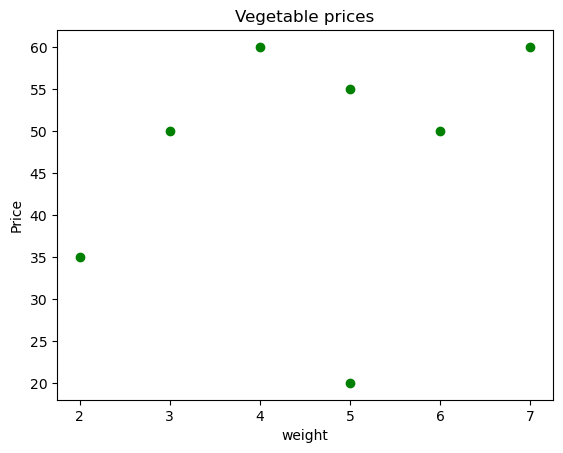

In [158]:
### creating a scatter plot

plt.scatter(df['x'], df['y_actual'], color = 'green')
plt.xlabel('weight')
plt.ylabel('Price')
plt.title('Vegetable prices')

Text(0.5, 1.0, 'Vegetable prices')

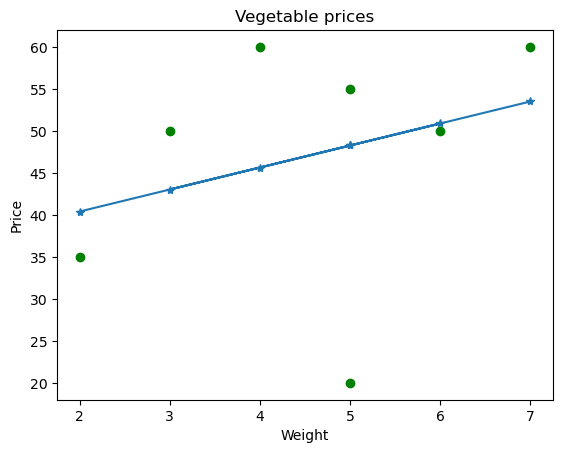

In [159]:
### creating best fit line

plt.plot(df['x'], df['y_prediction'], marker = '*')
plt.scatter(df['x'], df['y_actual'], color = 'green')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Vegetable prices')

# Task 03:
## Calculate both the Mean Squared Error (MSE) and Mean Absolute Error (MAE).

In [145]:
### calculate mse manually

manual_mse = sum((df['y_actual'] - df['y_prediction'])**2)/7
manual_mse

167.30990783410135

In [146]:
### calculating mae manually

manual_mae = sum(abs(df['y_actual']-df['y_prediction']))/7
manual_mae

9.87327188940092

## calculating mse, mae and rmse using sklearn and numpy

In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [148]:
mse = mean_squared_error(df['y_actual'],df['y_prediction'])
mse

167.30990783410135

In [150]:
mae = mean_absolute_error(df['y_actual'],df['y_prediction'])
mae

9.87327188940092

In [151]:
rmse = np.sqrt(mse) # root mean squared error
rmse

12.934833119685052

In [154]:
### creating a DataFrame which contain mse and mae and rmse values

calculation = pd.DataFrame({
    'cost_function': ['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error'],
    'Values': [mse, mae, rmse]
})

calculation

,cost_function,Values
0,Mean Squared Error,167.309908
1,Mean Absolute Error,9.873272
2,Root Mean Squared Error,12.934833


# Final Task:
## Generate an Excel file for the given dataset. Utilize Python for all the calculations.

In [156]:
with pd.ExcelWriter('assignment_03.xlsx') as writer:
    df.to_excel(writer, sheet_name='dataset', index=False)
    calculation.to_excel(writer, sheet_name = 'calculation', index = False)